In [4]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pyedflib
import numpy as np
from datetime import timedelta
from scipy.signal import decimate
import time
from os import listdir
    #method listdir() returns a list containing the names of the entries in the directory given by path.
from os.path import isfile, join
    #returns true if file in path is an existing regular file
    

path = "Y:/ADBS"
downsampling=2

In [6]:
# prepare ESM export from server
esm = df = pd.read_stata(path+'/esmDataPilot/PRDB_20181025T115653/SANPAR_BE.dta',convert_categoricals = False)
esm = esm[['subjno', 'mood_well', 'mood_down', 'mood_fright', 'mood_tense', 'phy_sleepy', 'phy_tired',
       'mood_cheerf', 'mood_relax', 'thou_concent', 'pat_hallu', 'loc_where',
       'soc_who', 'soc_who02', 'soc_who03', 'act_what', 'act_what02',
       'act_what03', 'act_norpob', 'sanpar_been', 'sanpar_stil',
       'sanpar_spreken', 'sanpar_lopen', 'sanpar_tremor', 'sanpar_traag',
       'sanpar_stijf', 'sanpar_spann', 'sanpar_beweeg', 'sanpar_onoff',
       'sanpar_medic', 'beep_disturb', '_datetime', '_datetime_e', 'dayno_n', 'beepno_n']]
esm['duration'] = esm['_datetime_e']-esm['_datetime']
# rename to english
esm = esm.rename(index=str,columns={'sanpar_been':'prob_mobility','sanpar_stil':'prob_stillness','sanpar_spreken':'prob_speech','sanpar_lopen':'prob_walking','sanpar_tremor':'temor','sanpar_traag':'slowness','sanpar_stijf':'stiffness','sanpar_spann':'tension','sanpar_beweeg':'dyskinesia','sanpar_onoff':'onoff','sanpar_medic':'medic'})



mapNames={}
for i in range(20):
    mapNames[9009989+i]=110001+i

esm['castorID'] = [mapNames[e] for e in esm['subjno']]

C:\ProgramData\Miniconda3\envs\p3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [7]:
# create list of files per L/R/chest from directory (mypath)

leftSensors = ['13797','13799','13794']
rightSensors = ['13805','13801','13793']
chestSensors = ['13804','13792','13803']

featureWindowLength=60
windowLength=60
esmWindowLength=15

mypath = 'C:/data/raw/MOX/110005/'
bdffiles = [f for f in listdir(mypath) if isfile(join(mypath,f)) and f[0]!='_' and f[-3:] =='edf']
#bdffiles are the files in mypath, not directories

leftFiles = []
rightFiles = []
chestFiles = []

for f in bdffiles:
    if f[0:5] in leftSensors:
        leftFiles.append(mypath + f)
    elif f[0:5] in rightSensors:
        rightFiles.append(mypath + f)
    elif f[0:5] in chestSensors:
        chestFiles.append(mypath + f)

leftFiles=sorted(leftFiles)
rightFiles=sorted(rightFiles)
chestFiles=sorted(chestFiles)

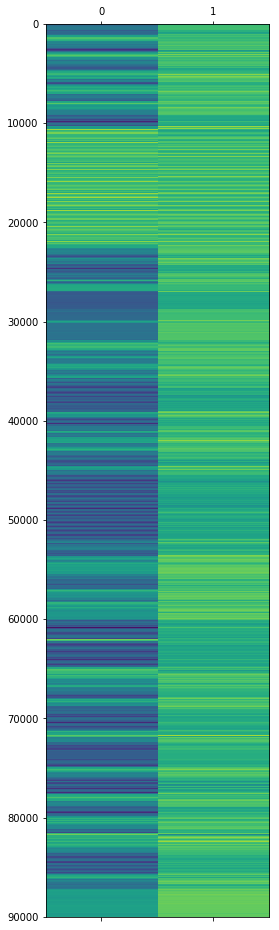

In [14]:
plt.matshow(trialData[0,:,0:2],aspect='auto')

In [12]:
print(trialData.shape)
print(selectedESM.shape)
np.save('C:/data/processed/ESM_pilot/trials.npy',trialData)
selectedESM.to_csv('C:\data\processed\ESM_pilot\esm.csv',index=False)

(69, 90000, 18)
(69, 37)


In [11]:
t=time.time()
trialData,selectedESM = extractRawTrials(leftFiles,rightFiles,chestFiles,esm[esm['castorID']==110005])
print(time.time()-t)

C:/data/raw/MOX/110005/13799_20181002_060804.edf


C:\ProgramData\Miniconda3\envs\p3\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
C:\ProgramData\Miniconda3\envs\p3\lib\site-packages\scipy\signal\signaltools.py:3463: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return y[sl]


C:/data/raw/MOX/110005/13799_20181003_070253.edf
C:/data/raw/MOX/110005/13799_20181003_070253.edf is broken
C:/data/raw/MOX/110005/13799_20181003_070256.edf
C:/data/raw/MOX/110005/13799_20181004_000000.edf
C:/data/raw/MOX/110005/13799_20181004_083502.edf
C:/data/raw/MOX/110005/13799_20181005_074601.edf
C:/data/raw/MOX/110005/13799_20181006_000000.edf
C:/data/raw/MOX/110005/13799_20181006_084256.edf
C:/data/raw/MOX/110005/13799_20181007_082759.edf
C:/data/raw/MOX/110005/13799_20181008_083214.edf
C:/data/raw/MOX/110005/13799_20181009_081701.edf
C:/data/raw/MOX/110005/13799_20181010_071928.edf
C:/data/raw/MOX/110005/13799_20181011_000000.edf
C:/data/raw/MOX/110005/13799_20181011_075902.edf
C:/data/raw/MOX/110005/13799_20181012_080146.edf
C:/data/raw/MOX/110005/13799_20181013_000000.edf
C:/data/raw/MOX/110005/13799_20181013_084619.edf
C:/data/raw/MOX/110005/13799_20181014_000000.edf
C:/data/raw/MOX/110005/13799_20181014_082141.edf
C:/data/raw/MOX/110005/13799_20181015_000000.edf
C:/data/ra

In [8]:
def extractRawTrials(leftFiles,rightFiles,chestFiles,esmFrame,esmWindowLength=15,featureWindowLength=60):
    # Read in the three list of files
    #Process leftWristData
    leftWristDF=[]
    rightWristDF=[]
    chestDF=[]
    
    files = [leftFiles, rightFiles, chestFiles]
    trials = [[[] for _ in range(esmFrame.shape[0])],[[] for _ in range(esmFrame.shape[0])], [[] for _ in range(esmFrame.shape[0])]]
    identifiers = ['l', 'r', 'c']
    foundTrials = np.zeros((esmFrame.shape[0],3))
    for i, f in enumerate(files):
        for file in f:
            print(file)
            try:
                labels, timeStamps, data, sr = readData(file) ## as input instead: leftFiles
                if data.shape[1]<sr * featureWindowLength:
                    raise ValueError('File too short to proceed.')
            except:
                print('%s is broken' % file)
                continue
            data = pd.DataFrame(data.T,index=timeStamps)
            for beep in range(esmFrame.shape[0]):
                if foundTrials[beep,i]==1:
                    continue
                beepTime=esmFrame['_datetime'].iloc[beep] # Get the corresponding time
                timediff = np.min(np.abs(data.index-beepTime)) 
                # Find corresponding moment for beep time in the sensor data
                #print(timediff)
                if timediff>timedelta(minutes=esmWindowLength):
                # If corresponding time is too far off, remove beep
                #print("Couldn't find corresponding sensor data")
                    continue
                pos=np.argmin(np.abs(data.index-beepTime))
                # For the smallest time difference find the position in the sensor data
                if pos>esmWindowLength*windowLength*sr:
                    trials[i][beep] = data.iloc[pos-(int(esmWindowLength*windowLength*sr)):pos]
                    foundTrials[beep,i]=1

    keep = np.sum(foundTrials,axis=1)==3
    trialData = np.zeros((np.sum(keep),int(esmWindowLength*windowLength*sr), 3 * 6))
    counter =0
    for beep in range(esmFrame.shape[0]):
        if keep[beep]:
            temp = np.concatenate((trials[0][beep],trials[1][beep],trials[2][beep]),axis=1)
            trialData[counter,:,:]=temp
            counter+=1
    foundESM = esmFrame.iloc[keep,:]   
    return trialData,  foundESM

In [10]:
def readData(filename): 
    #Extract data
    f = pyedflib.EdfReader(filename)
    sr = f.getSampleFrequencies()[0]
    n = f.signals_in_file
    signal_labels = f.getSignalLabels()
    sigbufs = np.zeros((n, f.getNSamples()[0]))
    for i in np.arange(n):
        sigbufs[i, :] = f.readSignal(i)    
    #Get starting time
    startingTime=f.getStartdatetime() #needs to be tested
    #startingTime=filename[-19:-4]
    #startingTime=pd.to_datetime(startingTime, format='%Y%m%d_%H%M%S', errors='ignore')
    #print(startingTime)
    sigbufs = decimate(sigbufs,downsampling,axis=1)
    sr=sr/downsampling
    timeStamps=pd.date_range(start=startingTime,periods=sigbufs.shape[1],freq='%d ms' % (1000/sr))
    return signal_labels, timeStamps, sigbufs, sr

In [ ]:
def alignFeaturesESM(listOfDF,esmFrame,esmColumns,esmWindowLength=15):
    
    combinedColumns=esmColumns
    for featureFrame in listOfDF:
        combinedColumns= combinedColumns + featureFrame.keys().tolist()  
    esmFeatures=pd.DataFrame(columns=combinedColumns) # Create new empty dataframe with feature and esm columns

    hop=np.mean(np.diff(listOfDF[0].index))
    for beep in range(esmFrame.shape[0]): #Loop through all the ESM Beeps
        beepTime=esmFrame['_datetime'].iloc[beep] # Get the corresponding time
        
        esmData=np.matlib.repmat(esmFrame.iloc[beep][esmColumns],esmWindowLength,1)
        combined=esmData
        
        subIndex=[beepTime-hop*t for t in range(esmWindowLength)][::-1]
        for featureFrame in listOfDF:
        
        
            timediff = np.min(np.abs(featureFrame.index-beepTime)) 
            # Find corresponding moment for beep time in the sensor data
            #print(timediff)
            if timediff>timedelta(minutes=esmWindowLength):
                # If corresponding time is too far off, remove beep
                #print("Couldn't find corresponding sensor data")
                continue
            pos=np.argmin(np.abs(featureFrame.index-beepTime))
            # For the smallest time difference find the position in the sensor data
            if pos>esmWindowLength:
                featColumns=featureFrame.keys().tolist() #The names of the features                
                featData=featureFrame.iloc[pos-esmWindowLength:pos][featColumns].values
                # Get corresponding timestamps
                
                # Repeat ESM data for each data point in the window
                combined=np.concatenate((combined,featData),axis=1)
                #Combine ESM & feature data
        if combined.shape[1]==len(combinedColumns):
            esmFeatures=esmFeatures.append(pd.DataFrame(combined,columns=combinedColumns,index=subIndex))
                #Append combined data to the dataframe
    return esmFeatures

In [ ]:
### Transform Gyro data into orientation estimation
from madgwickahrs import MadgwickAHRS
mw = MadgwickAHRS(sampleperiod=1/sr)
euler = np.zeros((3,sigbufs.shape[1]))
for sample in range(sigbufs.shape[1]):
    mw.update_imu(sigbufs[6:,sample],sigbufs[3:6,sample])
    euler[:,sample] = mw.quaternion.to_euler123()

In [ ]:
plt.matshow(euler,aspect='auto')
plt.yticks([0,1,2],['Roll', 'Pitch', 'Yaw'])
plt.xlabel('Time in samples')
plt.show()